<a href="https://colab.research.google.com/github/ertgrulyksk/Data-Science-Project-on-Text-and-Annotations/blob/main/Data_Science_Project_on_Text_and_Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [3]:
births = pd.read_csv("births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


<ipython-input-4-8bccb066a117>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births["day"] = births["day"].astype(int)
<ipython-input-4-8bccb066a117>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  birthsDate.index = [pd.datetime(2012, month, day) for (month, day) in birthsDate.index ]


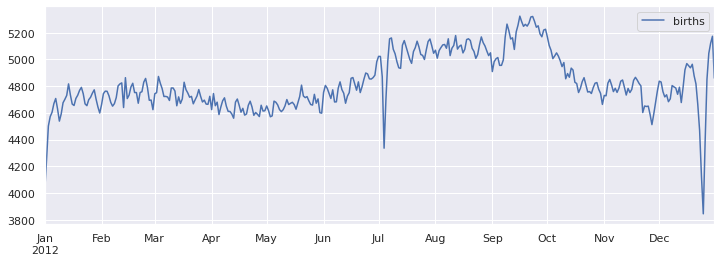

In [4]:
quartiles = np.percentile(births["births"],[25, 50, 75])
mean, sigma = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query("(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)")
births["day"] = births["day"].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = "%Y%m%d")
birthsDate = births.pivot_table("births", [births.index.month, births.index.day])
birthsDate.index = [pd.datetime(2012, month, day) for (month, day) in birthsDate.index ]
fig, ax = plt.subplots(figsize=(12, 4))
birthsDate.plot(ax=ax)
plt.show() 

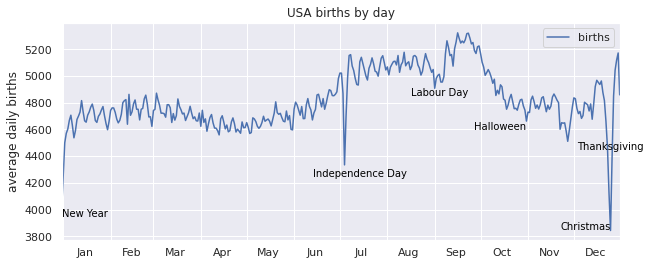

In [5]:
fig, ax = plt.subplots(figsize=(10,4))
birthsDate.plot(ax=ax)
style = dict(size=10, color='black')
ax.text("2012-1-1", 3950, "New Year", **style)
ax.text("2012-7-14", 4250, "Independence Day", ha="center", **style)
ax.text("2012-9-4", 4850, "Labour Day", ha="center", **style)
ax.text("2012-10-31", 4600, "Halloween", ha="right", **style)
ax.text("2012-12-25", 4450, "Thanksgiving", ha="center", **style)
ax.text("2012-12-25", 3850, "Christmas", ha="right", **style)
# Labeling the axes
ax.set(title= "USA births by day", ylabel="average daily births")
# Format the x axis with centerd month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%h"))
plt.show()

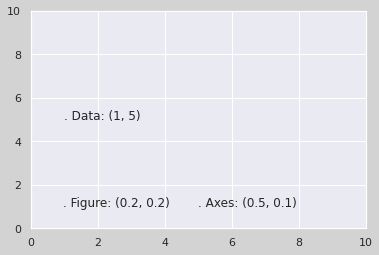

In [6]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])
# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)
plt.show()

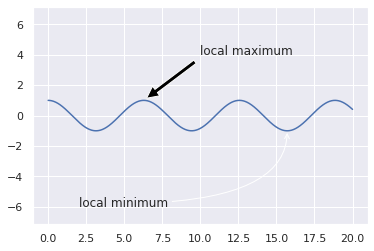

In [7]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle3,angleA=0,angleB=-90"))
plt.show()

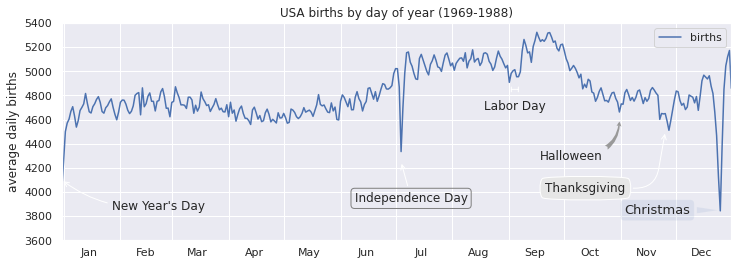

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
birthsDate.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
xytext=(50, -30), textcoords='offset points',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
bbox=dict(boxstyle="round", fc="none", ec="gray"),xytext=(10, -40), textcoords='offset points', ha='center',
arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
xycoords='data', textcoords='data',
arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
xytext=(-80, -40), textcoords='offset points',
arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
xytext=(-120, -60), textcoords='offset points',
bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
xytext=(-30, 0), textcoords='offset points',
size=13, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400)
plt.show()